In [48]:
#from read_epi import data
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import pymc as pm
mpl.rcParams['figure.dpi']= 200

In [4]:
data = pd.read_csv("all_data_Brain_GSE50161.csv")
data = data.to_numpy()
N, D = data.shape

In [35]:
sample = data[:,6]
hist = np.histogram(sample, bins=10, density=False)
indices = np.digitize(np.float64(sample), np.float64(hist[1]), right=False)

In [36]:
lam = np.mean(hist[0])
models = [stats.poisson.pmf(hist[0][i], lam) for i in range(len(hist[0]))]

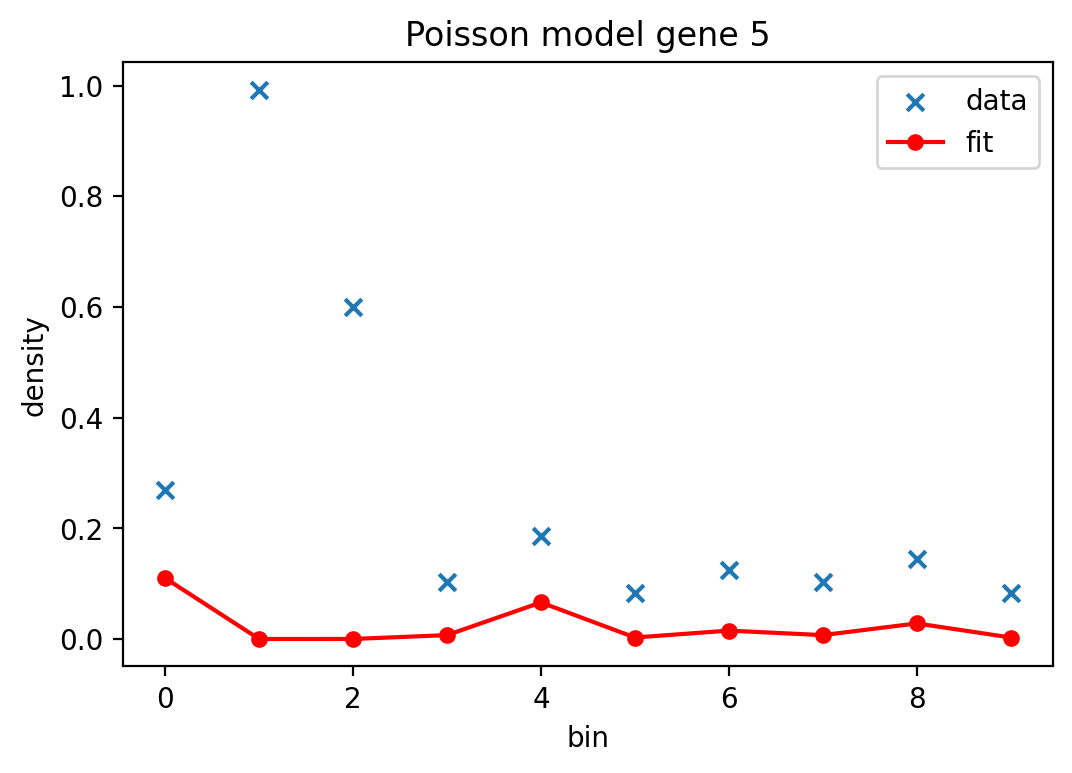

In [37]:
fig, ax = plt.subplots(1,1)
bins = np.arange(len(hist[1]) - 1)
density = np.histogram(sample, bins=hist[1], density=True)[0]
plt.scatter(bins, density, label="data", marker="x")
ax.plot(bins, models, color="red", ms=5, label="fit", marker="o")
plt.xlabel("bin")
plt.ylabel("density")
plt.title("Poisson model gene 5")
plt.legend()

In [8]:
models

[0.0008276572845228969,
 0.006993704054218464,
 0.10993981424841123,
 0.0660539621337744,
 0.04572966609261302,
 0.0660539621337744,
 0.00011493300917401683,
 2.2326067299320745e-05,
 0.0036506854074670964,
 0.0008276572845228969]

In [36]:
with pm.Model() as model:
    w = pm.Dirichlet('w', a=np.array([2, 2]))  # 2 mixture weights

    lam1 = pm.Gamma('lam1', alpha=2, beta=2)
    lam2 = pm.Gamma('lam2', alpha=2, beta=2)

    # As we just need the logp, rather than add a RV to the model, we need to call `.dist()`
    # These two forms are equivalent, but the second benefits from vectorization
    components = [
        pm.Poisson.dist(mu=lam1),
        pm.Poisson.dist(mu=lam2),
    ]
    # `shape=(2,)` indicates 2 mixture components
    components = pm.Poisson.dist(mu=pm.math.stack([lam1, lam2]), shape=(2,))

    like = pm.Mixture('like', w=w, comp_dists=components, observed=np.int64(sample))

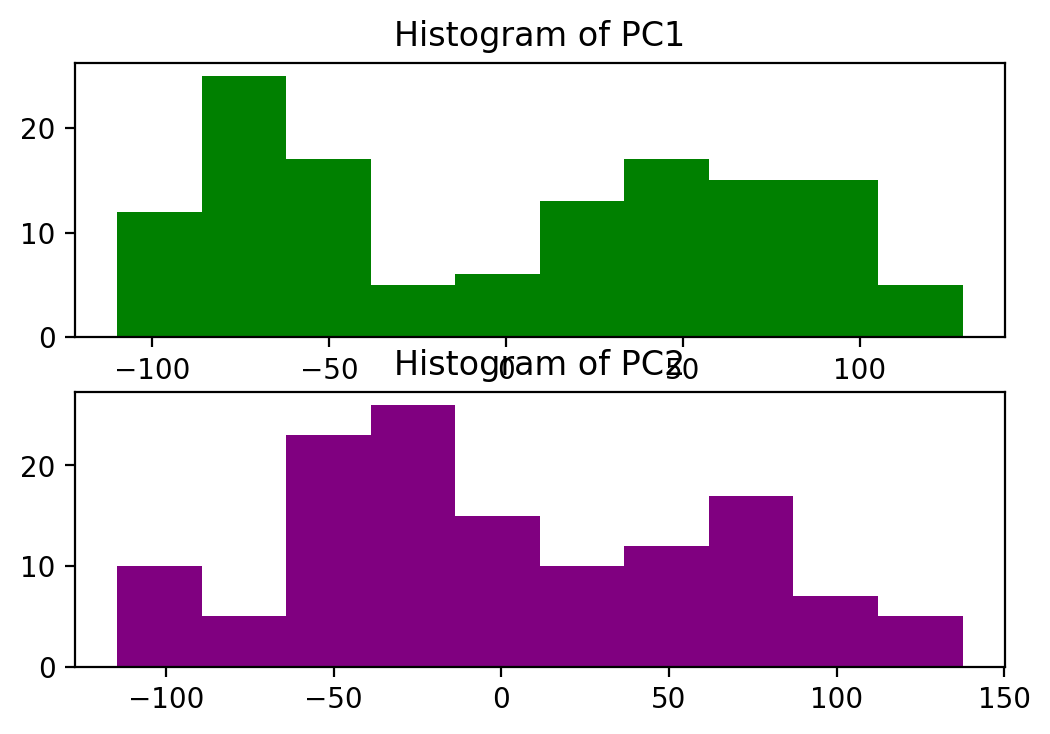

In [50]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca.fit(data[:,2:])
data_pcaed = pca.transform(data[:,2:])

figure, axis = plt.subplots(2, 1)
# first plotting the PCA space
# axis[0].scatter(data_pcaed[:,0], data_pcaed[:,1])
# axis[0].set_xlabel("PC1")
# axis[0].set_ylabel("PC2")
# axis[0].set_title("Top 2 Principal Components")
# second plotting histogram for PC1
axis[0].hist(data_pcaed[:,0], color="g")
axis[0].set_title("Histogram of PC1")
# third plotting histogram for PC2
axis[1].hist(data_pcaed[:,1], color="purple")
axis[1].set_title("Histogram of PC2")
plt.show()

In [ ]:
g = sns.FacetGrid()